In [1]:
# Check your Python version
!python --version

Python 3.8.8


In [2]:
!pip install tensorflow

In [3]:
!pip install scikit-learn

In [4]:
!pip install matplotlib

In [5]:
!pip install pandas

In [6]:
!pip install pandas

In [7]:
!pip install Wave

In [8]:
!pip install glob2

In [9]:
"""
Code borrowed from: 
"https://github.com/MITESHPUTHRANNEU/Speech-Emotion-Analyzer"
"https://github.com/MITESHPUTHRANNEU/Speech-Emotion-Analyzer/blob/master/saved_models/Emotion_Voice_Detection_Model.h5"
"https://github.com/MITESHPUTHRANNEU/Speech-Emotion-Analyzer/blob/master/AudioRecorder.ipynb"
"""

# Record and save a 4s recording as a WAV file named "output10", in the same location as this notebook file

import pyaudio
import wave

CHUNK = 1024 
FORMAT = pyaudio.paInt16 #paInt8
CHANNELS = 2 
RATE = 44100 #sample rate
RECORD_SECONDS = 4
WAVE_OUTPUT_FILENAME = "output10.wav"

p = pyaudio.PyAudio()

stream = p.open(format=FORMAT,
                channels=CHANNELS,
                rate=RATE,
                input=True,
                frames_per_buffer=CHUNK) #buffer

print("* recording")

frames = []

for i in range(0, int(RATE / CHUNK * RECORD_SECONDS)):
    data = stream.read(CHUNK)
    frames.append(data) # 2 bytes(16 bits) per channel

print("* done recording")

stream.stop_stream()
stream.close()
p.terminate()

wf = wave.open(WAVE_OUTPUT_FILENAME, 'wb')
wf.setnchannels(CHANNELS)
wf.setsampwidth(p.get_sample_size(FORMAT))
wf.setframerate(RATE)
wf.writeframes(b''.join(frames))
wf.close()

* recording
* done recording


In [20]:
!cd

C:\Users\emcor\Documents\Day_22


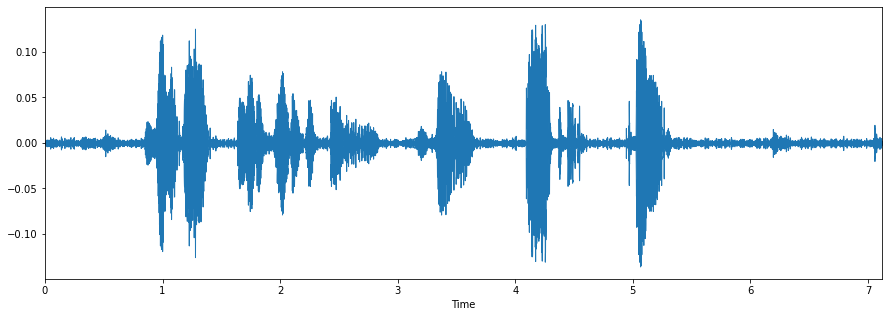

In [1]:
# Import our recording ("output10.wav") and plot the waveform

import librosa
from librosa.display import waveplot
import matplotlib.pyplot as plt

data, sampling_rate = librosa.load('audio1.wav')


import os
import pandas as pd
import librosa
import glob 

plt.figure(figsize=(15, 5))
waveplot(data, sr=sampling_rate)

In [2]:
# Extract audio features (MFCCs) into a Numpy array
import numpy as np

#livedf= pd.DataFrame(columns=['feature'])
X, sample_rate = librosa.load('audio1.wav', res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)
sample_rate = np.array(sample_rate)
mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13),axis=0)
featurelive = mfccs
livedf2 = featurelive

In [3]:
# Transfer data from Numpy array to Pandas dataframe
livedf2= pd.DataFrame(data=livedf2)
livedf2

,0
0,-26.564806
1,-24.490227
2,-22.464672
3,-21.913631
4,-23.455523
...,...
211,-27.243805
212,-25.322527
213,-25.796793
214,-25.860352


In [4]:
# Transpose dataframe so that rows become columns and columns become rows
livedf2 = livedf2.stack().to_frame().T

In [5]:
livedf2

,0,1,2,3,4,5,6,7,8,9,...,206,207,208,209,210,211,212,213,214,215
,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,-26.564806,-24.490227,-22.464672,-21.913631,-23.455523,-23.652428,-22.937948,-24.30122,-25.492811,-27.386963,...,-25.247322,-25.862885,-26.198843,-26.393572,-25.321739,-27.243805,-25.322527,-25.796793,-25.860352,-25.221073


In [6]:
# Take data into Numpy array and add another dimension
twodim= np.expand_dims(livedf2, axis=2)
twodim

array([[[-26.564806],
        [-24.490227],
        [-22.464672],
        [-21.913631],
        [-23.455523],
        [-23.652428],
        [-22.937948],
        [-24.30122 ],
        [-25.492811],
        [-27.386963],
        [-24.730227],
        [-24.21632 ],
        [-26.134762],
        [-27.0383  ],
        [-26.57737 ],
        [-26.653383],
        [-28.546816],
        [-27.38758 ],
        [-27.461103],
        [-25.77234 ],
        [-26.116526],
        [-27.249693],
        [-26.855703],
        [-26.723734],
        [-25.883259],
        [-26.588905],
        [-27.452293],
        [-26.05331 ],
        [-25.984837],
        [-25.220379],
        [-25.140654],
        [-22.837738],
        [-21.084139],
        [-20.481401],
        [-20.253208],
        [-21.878906],
        [-21.592978],
        [-19.960207],
        [-19.01431 ],
        [-19.23282 ],
        [-19.4614  ],
        [-17.52574 ],
        [-19.061413],
        [-21.373274],
        [-21.96205 ],
        [-

In [7]:
# Load in the pretrained H5 model called "Emotion_Voice_Detection_Model", the one we downloaded from "https://github.com/MITESHPUTHRANNEU/Speech-Emotion-Analyzer"
import tensorflow as tf
loaded_model = tf.keras.models.load_model('Emotion_Voice_Detection_Model.h5')

AttributeError: 'str' object has no attribute 'decode'

In [ ]:
# Let the H5 model make the prediction on our audio features (MFCCs)
livepreds = loaded_model.predict(twodim, 
                         batch_size=32, 
                         verbose=1)

In [ ]:
# Print out the percentage values of the output layer (Softmax output)
livepreds

In [ ]:
# Print out the label predicted by our H5 model
livepreds1=livepreds.argmax(axis=1)
print(livepreds1)

In [ ]:
# Make sure the label is in integer format
liveabc = livepreds1.astype(int).flatten()
print(liveabc)

In [ ]:
# Define the encoding of the ten string labels into their respective integer labels (0-9), according to the order of the original H5 project ("https://github.com/MITESHPUTHRANNEU/Speech-Emotion-Analyzer")
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()
str_labels = np.array(["female_angry", "female_calm", "female_fearful", "female_happy", "female_sad", "male_angry", "male_calm", "male_fearful", "male_happy", "male_sad"])
int_labels = lb.fit_transform(str_labels)
print(int_labels)

In [ ]:
# Convert integer label to string label
livepredictions = (lb.inverse_transform((liveabc)))
print(livepredictions)